# Midterm Project : M.A.F.I.A. in the morning(2)
* * *

## 2. 경찰은 마피아를 찾습니다
* 가장 단순한 게임에 경찰이 들어옵니다.
    * 경찰은 매일 시작 전에 사람을 지목해서 마피아인지 확인할 수 있습니다.
        * 마피아를 지목할수도, 시민을 지목할 수도 있지요
    * 경찰이 마피아를 확인한다면 마피아가 발각될 확률을 약간 올려준다고 생각해 봅시다. 
        * 이 확률도 parameter로 쓸 수 있겠죠?
    * 경찰의 기억력은 형편 없어서 그날 확인한 사람은 당일만 알고 있는 경우도 생각해보고
    * 경찰이 기억력이 좋아서 그날 확인한 사람을 계속 알고 있는 경우도 생각해볼 수 있겠죠
* 이 경우 확률은 어떻게 변화할까요? 어떤 패턴이 있을까요?
    * 참고로 경찰은 시민의 일종입니다. 마피아가 밤에 죽일 수도 있습니다.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter
import random

### 구현 방법

- practice1을 기반으로 경찰을 추가
- 경찰은 마피아를 찾음
    - 편의를 위해 구현은 낮에 하였으나 살인이 끝난 후 새벽에 마피아를 검거한다는 설정
- 랜덤하게 참가자중 한 명을 찾고 마피아인지 확인
    - 마피아가 맞다면 인덱스를 반환
- 낮투표중 경찰의 신뢰도를 랜덤하게 반환
    - 신뢰도는 참가 인원 중 몇 명을 신뢰하게 만들었는지로 확인
    - 과반수 이상 일 경우 기존 투표결과를 경찰이 찾은 마피아로 변경

### Code

- 기존 코드에서의 변경 내용을 표시

In [2]:
def job_Init(num, job, list):
    for i in range(0, num):
        list.append(job)

def people_Count(list):
    mafia=list.count("mafia")
    citizen=list.count("citizen")
    police=list.count("police")
    participant = mafia + citizen + police
    return mafia, citizen, police, participant

def modefinder(numbers):
    c = Counter(numbers)
    mode = c.most_common(1)
    return mode[0][0]

- police_Find(리스트) : 참가 인원 중 랜덤하게 한 명을 지목해 마피아를 찾으면 그 인덱스를 반환

In [3]:
def police_Find(participant):
    arrest=random.randrange(0, len(participant)-1)
    if participant[arrest]=="police":
        police_Find(participant)
    elif participant[arrest] == "mafia":
        return arrest
    return None

- police_arrest(인덱스, 리스트) : 경찰이 살아있을 때, 경찰에 대한 시민의 신뢰도를 랜덤하게 결정, 과반수 이상일 때 마피아 인덱스를 반환

In [4]:
def police_arrest(vote, participants):
    if participants.count("police") == 0:
        return vote
    else:
        trust=random.randrange(0, len(participants))
        if trust*2 > len(participants):
            find = police_Find(participants)
            if find!=None:
                return find
    return vote

- 낮투표의 최빈값을 계산, 경찰의 신뢰도가 과반수 이상이면 투표를 무시하고 마피아를 검거

In [5]:
def day_Vote(participants):
    vote_list=list()
    mafia_count=participants.count("mafia")
    for i in range(0, len(participants)):
        if participants[i]=="mafia":
            vote=random.randrange(mafia_count, len(participants))
            vote_list.append(vote)
        else:
            vote=random.randrange(0, len(participants))
            vote_list.append(vote)
    max_vote=modefinder(vote_list)
    max_vote=police_arrest(max_vote, participants)
    del participants[max_vote]
    return participants

In [6]:
def night_Kill(participants):
    vote_list=list()
    mafia_idx=0
    mafia_count=participants.count("mafia")
    while(participants[mafia_idx] == "mafia"):
        vote=random.randrange(mafia_count, len(participants))
        vote_list.append(vote)
        mafia_idx+=1
    max_vote=modefinder(vote_list)
    del participants[max_vote]
    return participants

In [7]:
def in_Game(participants):
    turn = "morning"
    mafia, citizen, police, people = people_Count(participants)
    while (mafia > 0) & (people-mafia > mafia) == True:
        if turn == "morning":
            participants = day_Vote(participants)
            turn = "night"
        else:
            participants = night_Kill(participants)
            turn = "morning"
        mafia, citizen, police, people = people_Count(participants)
        #print(participants)
    if mafia == 0:
        return True
    else:
        return False

In [8]:
def citizen_win_Rate(participants):
    wincount = 0
    mafia=participants.count("mafia")
    citizen=participants.count("citizen")
    police=participants.count("police")
    times=100
    for i in range(0,times):
        participants=list()
        job_Init(mafia, "mafia", participants)
        job_Init(citizen, "citizen", participants)
        job_Init(police, "police", participants)
        if in_Game(participants) == True:
            wincount += 1
    return 100*wincount/times

In [9]:
def Mafia_Game_withPolice_Stats(num_mafia, num_citizen, num_police):
    mafia = num_mafia
    citizen = num_citizen
    police = num_police
    citizen_win_list=list()
    for i in range (0, 100):
        Game_participants=list()
        job_Init(mafia, "mafia", Game_participants)
        job_Init(citizen, "citizen", Game_participants)
        job_Init(police, "police", Game_participants)
        rate=citizen_win_Rate(Game_participants)
        citizen_win_list.append(rate)
    return citizen_win_list

#Mafia_Game_withPolice_Stats(1,0,9)

In [10]:
def Mafia_Game_changewithPolice(num_mafia, num_citizen, num_police):
    mafia = num_mafia
    citizen = num_citizen
    police = num_police
    participants = mafia + citizen + police
    citizen_win_list=list()
    while mafia*2 < participants:
        mafia += 1
        citizen -= 1
        Game_participants=list()
        job_Init(mafia, "mafia", Game_participants)
        job_Init(citizen, "citizen", Game_participants)
        job_Init(police, "police", Game_participants)
        rate=citizen_win_Rate(Game_participants)
        citizen_win_list.append(rate)
    return citizen_win_list

### Data Frame
- 마피아가 2명, 시민이 7명, 경찰이 1명일 때 100번의 게임 중 시민의 우승 확률을 100번 구함

In [11]:
Game_participants=list()
col=["Citizens to Win(%)"]
Game = Mafia_Game_withPolice_Stats(2, 7, 1)
length=len(Game)
index = list()
for i in range(1, length+1):
    index.append(i)

df=pd.DataFrame(Game, index, columns=col)
df

,Citizens to Win(%)
1,16.0
2,13.0
3,16.0
4,7.0
5,14.0
...,...
96,14.0
97,12.0
98,12.0
99,15.0


### Histogram

x축은 횟수, y축은 시민의 승률

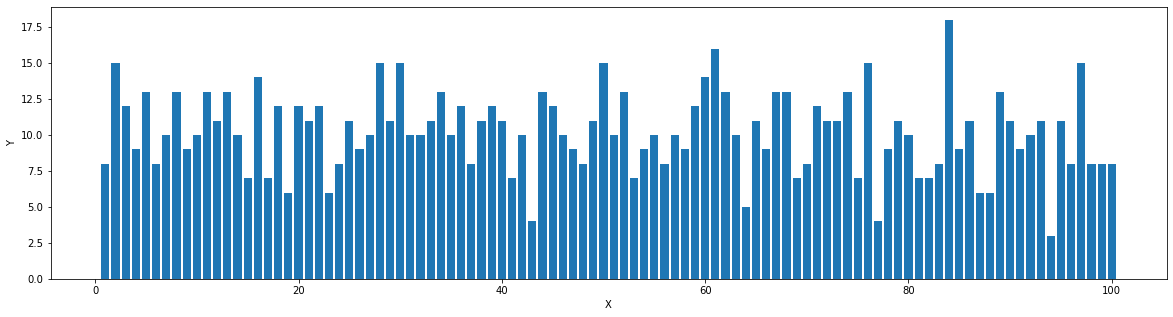

In [12]:
def drawPLT(list1):
    length=len(list1)
    list2 = list()
    for i in range(1, length+1):
        list2.append(i)
    plt.figure(figsize=(20,5))
    plt.bar(list2, list1)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()
    plt.close()

Game_Stats = Mafia_Game_withPolice_Stats(2, 7, 1)
drawPLT(Game_Stats)

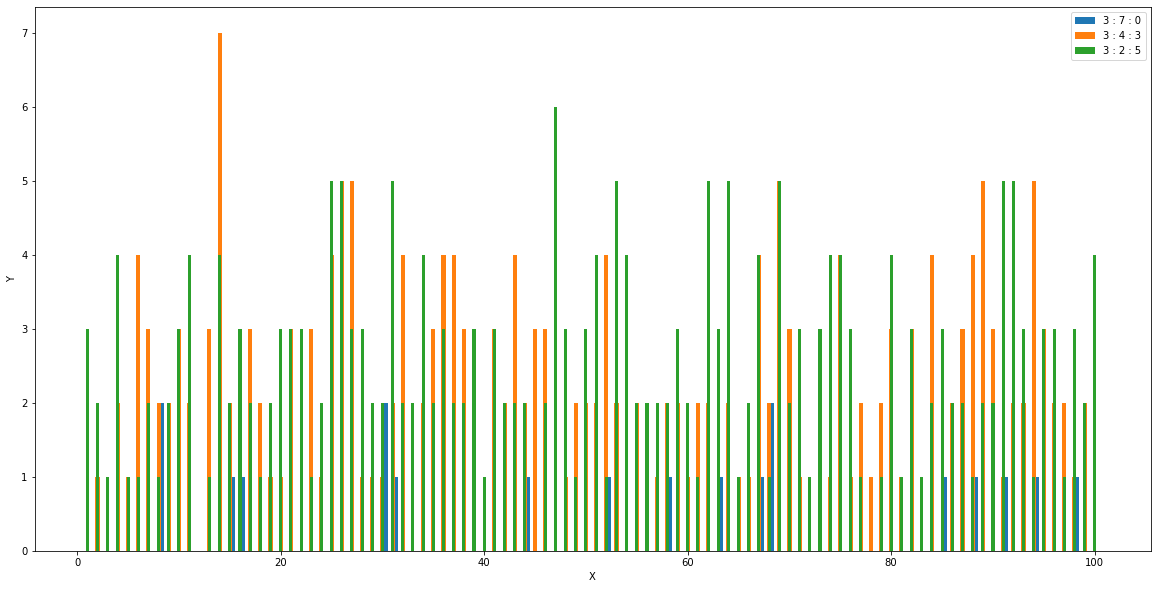

In [13]:
Game_Stats1 = Mafia_Game_withPolice_Stats(3, 7, 0)
Game_Stats2 = Mafia_Game_withPolice_Stats(3, 4, 3)
Game_Stats3 = Mafia_Game_withPolice_Stats(3, 2, 5)

list0 = list()
length = len(Game_Stats1)
for i in range(1, length+1):
    list0.append(i)
    
plt.figure(figsize=(20,10))
plt.bar(list0, Game_Stats1, width=0.5, align="edge", label="3 : 7 : 0")
plt.bar(list0, Game_Stats2, width=0.4, align="center", label="3 : 4 : 3")
plt.bar(list0, Game_Stats3, width=0.3, label="3 : 2 : 5")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
plt.close()

### Data Frame
- 경찰 3명을 포함한 전체 게임인원 100명 중 마피아의 비율(%)을 인덱스로 하여 확률을 나타냄

In [14]:
Game_participants=list()
col=["Citizens to Win(%)"]
Game = Mafia_Game_changewithPolice(0, 97, 3)
length=len(Game)
index = list()
for i in range(1, length+1):
    index.append(i)

df=pd.DataFrame(Game, index, columns=col)
df

,Citizens to Win(%)
1,82.0
2,47.0
3,48.0
4,37.0
5,29.0
6,13.0
7,10.0
8,5.0
9,2.0
10,1.0


### Histogram

- 경찰 3명을 포함한 전체 게임인원 각 10, 50, 100명
- x축은 마피아의 명 수, y축은 시민의 승률

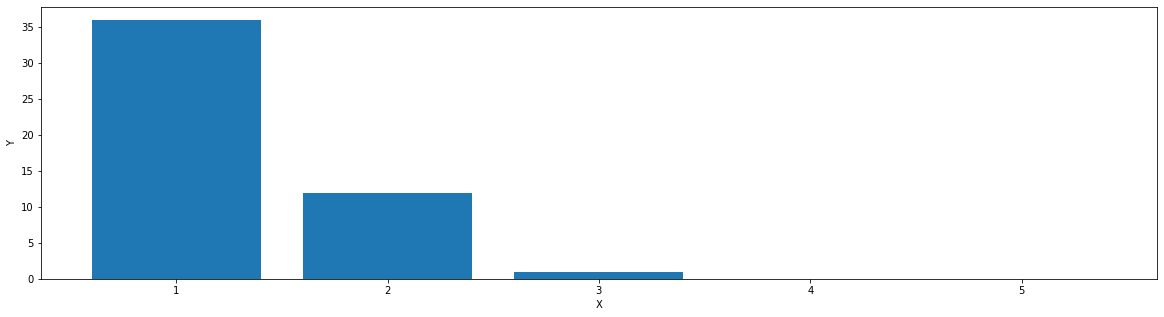

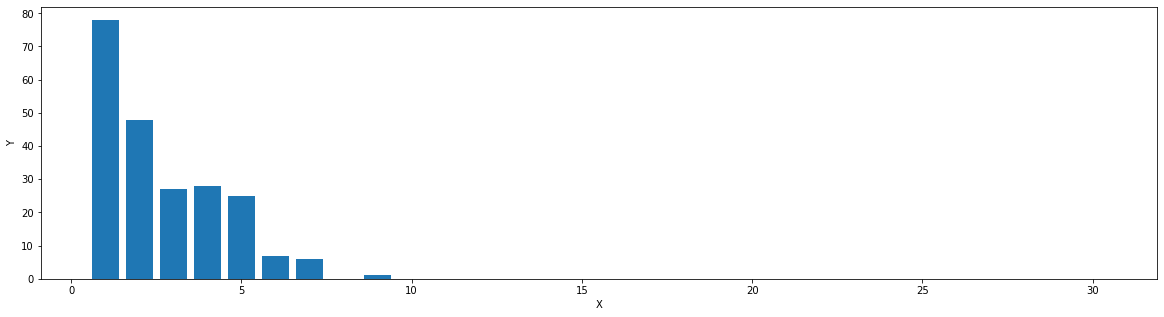

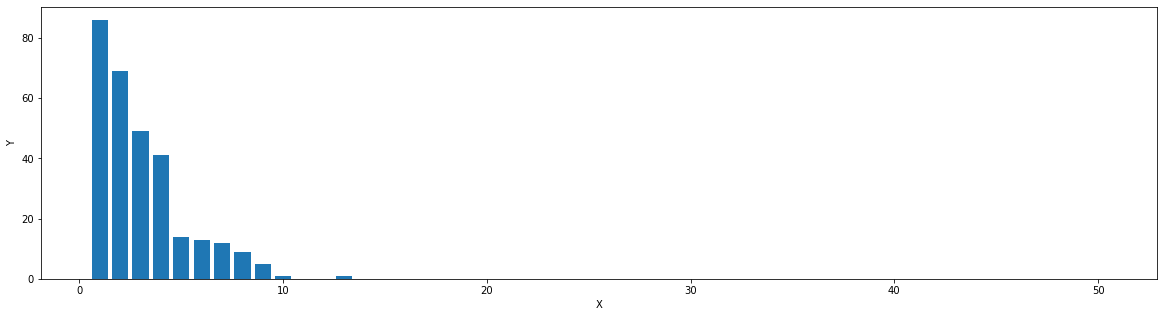

In [15]:
Game_Stats = Mafia_Game_changewithPolice(0, 7, 3)
drawPLT(Game_Stats)

Game_Stats = Mafia_Game_changewithPolice(0, 57, 3)
drawPLT(Game_Stats)

Game_Stats = Mafia_Game_changewithPolice(0, 97, 3)
drawPLT(Game_Stats)

### Histogram

- 전체 게임인원 10명, 경찰의 비율을 조정
- x축은 마피아의 명 수, y축은 시민의 승률

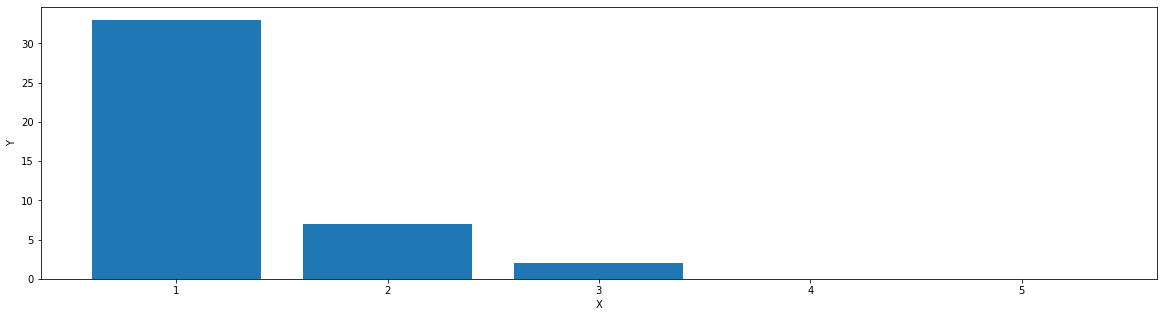

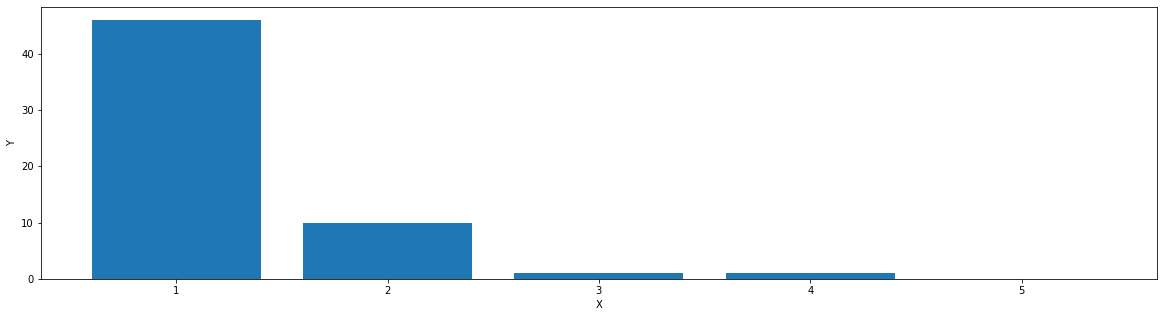

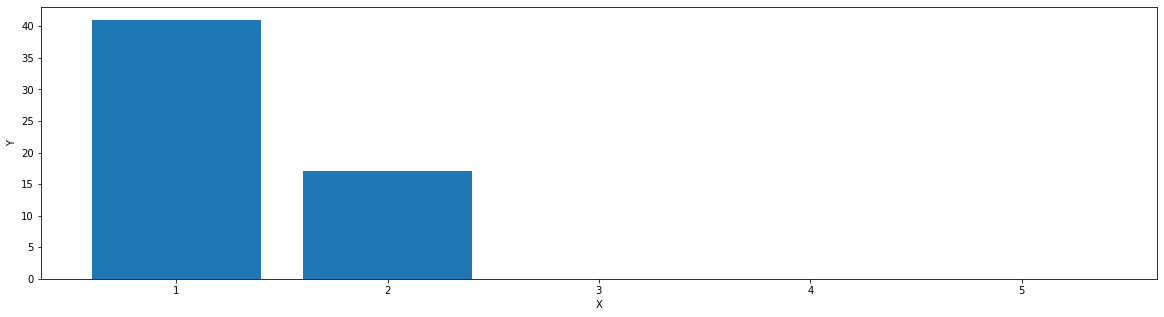

In [16]:
Game_Stats = Mafia_Game_changewithPolice(0, 9, 1)
drawPLT(Game_Stats)
Game_Stats = Mafia_Game_changewithPolice(0, 8, 2)
drawPLT(Game_Stats)
Game_Stats = Mafia_Game_changewithPolice(0, 7, 3)
drawPLT(Game_Stats)